### Data loading ###

In [ ]:
from plot import *

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/cesarcamusemschwiller/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [10]:
import numpy as np

data_path = "data/twitter-datasets/"
test_path = f"{data_path}test_data.txt"
trainP_path = f"{data_path}train_pos_full.txt"
trainN_path = f"{data_path}train_neg_full.txt"

def load_and_clean_test_tweets(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        tweets = file.readlines()
    test_tweets = [re.sub(r"^\d+,\s*", "", tweet).strip() for tweet in tweets]
    return test_tweets

def load_tweets(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        tweets = file.readlines()
    return tweets

test_tweets = load_and_clean_test_tweets(test_path)
trainP_tweets = load_tweets(trainP_path)
trainN_tweets = load_tweets(trainN_path)

train_tweets = np.concatenate((trainP_tweets, trainN_tweets))

### Data exploration ###

In [ ]:
#Analysis of redundant tweets

import numpy as np

def count_unique_tweets(tweets):
    tweets = np.array(tweets, dtype=str)
    
    unique_tweets = np.unique(tweets)
    return len(unique_tweets)

ratio_unique_tweets_pos = count_unique_tweets(trainP_tweets) / len(trainP_tweets)
print(f"Ratio of positive unique tweets: {ratio_unique_tweets_pos}")

ratio_unique_tweets_neg = count_unique_tweets(trainN_tweets) / len(trainN_tweets)
print(f"Ratio of negative unique tweets: {ratio_unique_tweets_neg}")

ratio_unique_tweets = count_unique_tweets(train_tweets) / len(train_tweets)
print(f"Ratio of unique tweets: {ratio_unique_tweets}")


Ratio of positive unique tweets: 0.9021152
Ratio of negative unique tweets: 0.9142704
Ratio of unique tweets: 0.9074364


We oberve small redundancy in the dataset. Furthermore these redundant tweets are balanced across the two classes. For these reasons we decide not to filter the duplicates as they may convey more relevant information about tweets, without introducing a bias between the classes.

In [ ]:
#Analysis of longest tweets

data_paths = [
    'data/twitter-datasets/train_neg_full.txt',
    'data/twitter-datasets/train_pos_full.txt'
]
clean_paths = [
    'data/twitter-datasets/test_data.txt'
]

threshold = 40


print(f"Number of tweets longer than {threshold} words : ",count_tweets_above_word_threshold(data_paths, clean_paths, threshold))
print(f"Ratio of tweets longer than {threshold} words : ",ratio_tweets_above_word_threshold(data_paths, clean_paths, threshold))

Number of tweets longer than 40 words :  1038
Ratio of tweets longer than 40 words :  0.0004135458167330677


In [ ]:
#Analysis of most common words

data_paths = ["data/twitter-datasets/train_neg_full.txt", "data/twitter-datasets/train_pos_full.txt"]
clean_paths = ["data/twitter-datasets/test_data.txt"]
vocab_path = "vocab_cut.txt"

top_words = top_100_words_from_datasets(data_paths, clean_paths, vocab_path, min_word_length=5)
    
for word, count in top_words:
    print(f"{word}: {count}")

<user>: 1611759
<url>: 528932
frame: 102828
follow: 92474
don't: 85085
please: 81976
thanks: 69097
about: 64626
really: 63625
today: 60578
can't: 59793
going: 56904
think: 55238
there: 51399
would: 46227
paperback: 43841
still: 41148
thank: 40061
never: 39693
night: 39596
happy: 39137
right: 38996
tomorrow: 38114
that's: 37208
people: 35411
you're: 35339
black: 34819
gonna: 34156
wanna: 33850
picture: 33603
complete: 32361
school: 32159
great: 31761
should: 31283
always: 31168
could: 30598
better: 29394
sorry: 27771
tonight: 27450
poster: 26904
though: 26881
because: 26371
tweet: 26088
again: 25791
first: 25429
custom: 25187
morning: 24641
sleep: 24636
twitter: 24404
birthday: 24218
friends: 23398
edition: 22921
where: 22901
someone: 22858
little: 22136
phone: 22090
didn't: 21951
being: 21628
world: 21609
watch: 21576
getting: 21297
after: 20834
everyone: 20371
something: 20247
amazing: 19369
video: 19336
thing: 19075
beautiful: 18635
friend: 17898
hahaha: 17479
cause: 17385
following:

### Tweets length plot ###

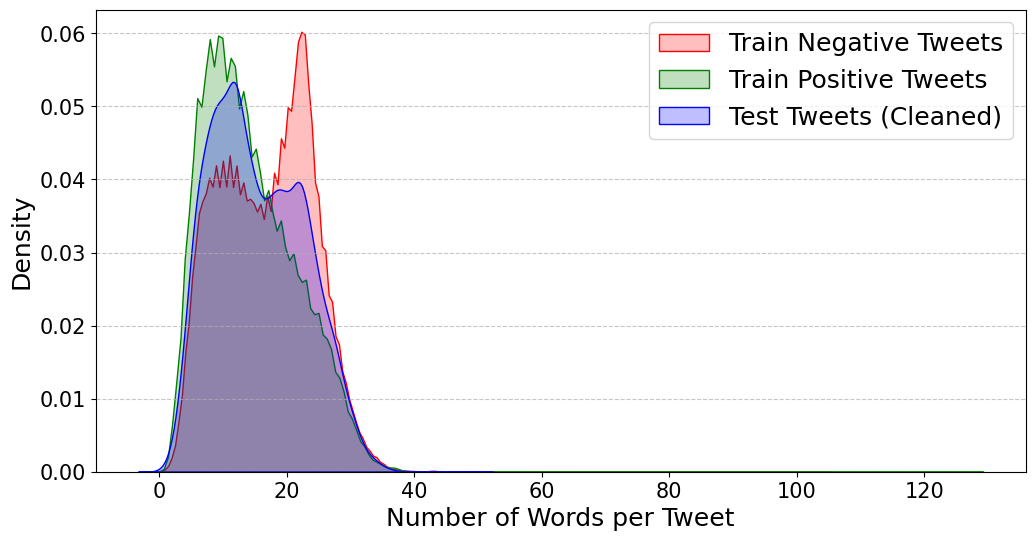

In [ ]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

data_paths = [
    'data/twitter-datasets/train_neg_full.txt',
    'data/twitter-datasets/train_pos_full.txt'
]
clean_paths = [
    'data/twitter-datasets/test_data.txt'
]
vocab_path = "vocab_cut.txt"

tweet_length_plotter(data_paths, clean_paths, vocab_path, count_words=True, normalize=True, plot_type='kde')
